# Projects - Gender Prediction

In [1]:
import nltk
import random

In [2]:
from nltk.corpus import names

In [3]:
names.fileids()

['female.txt', 'male.txt']

In [4]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [5]:
cfd = nltk.ConditionalFreqDist((fileid,name[-2:]) for fileid in names.fileids() for name in names.words(fileid))

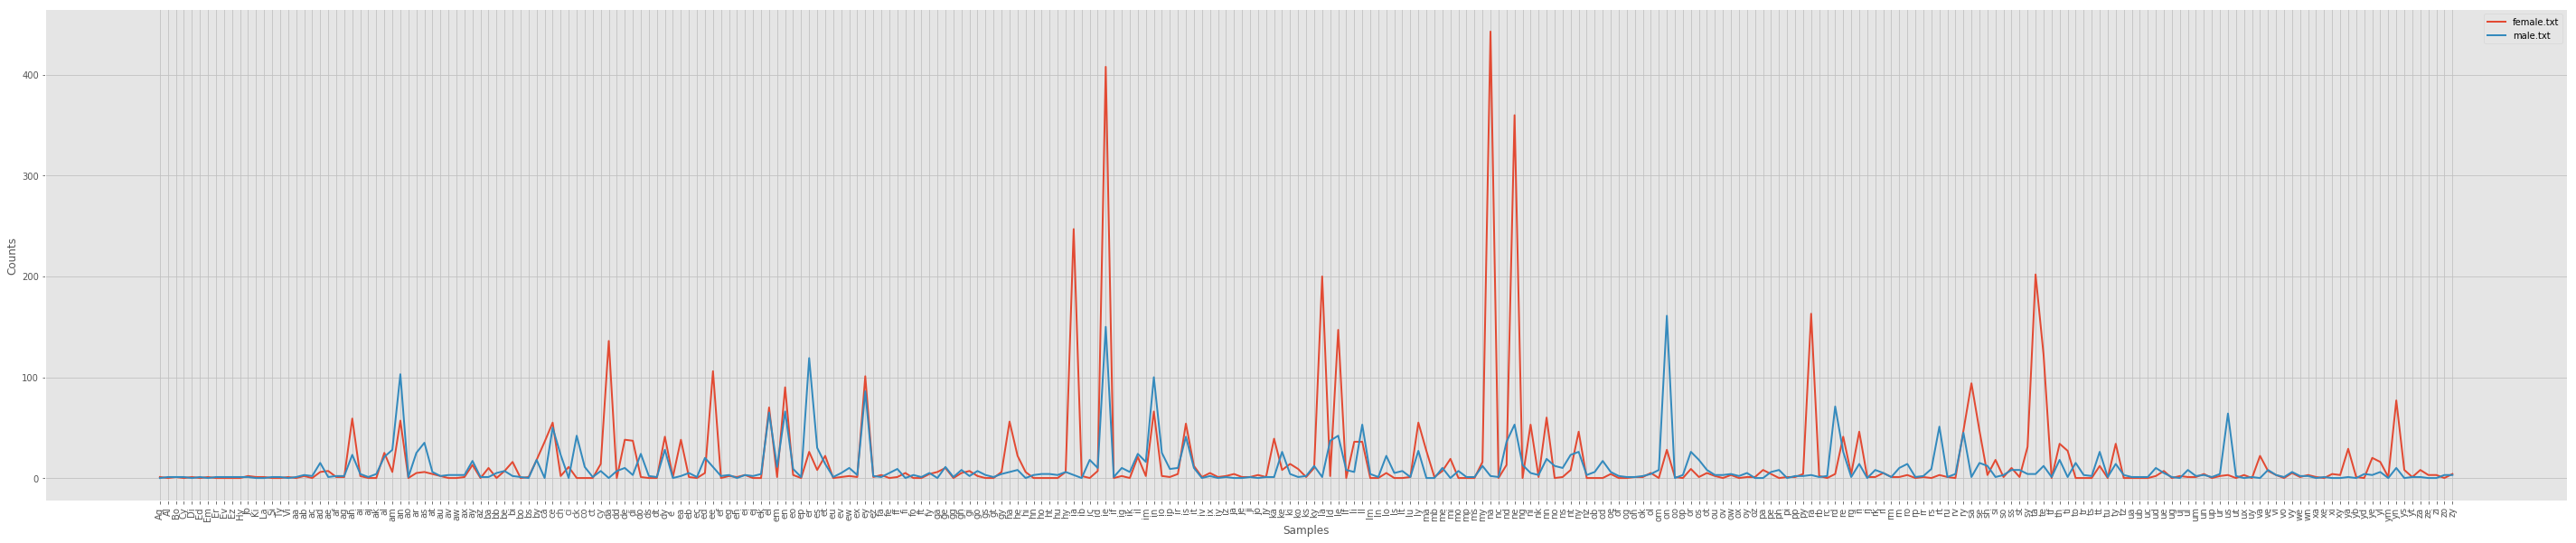

In [6]:
plt.figure(figsize=(50,10))
cfd.plot()

The plot shows us that a decent numbner of ending letter pairs have tend to lean towords female or male names.  Let's use this as our feature to build a feature set.

In [7]:
def name_feature(name):
    return {'pair': name[-2:]}

In [8]:
name_feature("Katy")

{'pair': 'ty'}

In [9]:
name_list = ([(name, 'male') for name in names.words('male.txt')] + [(name, "female") for name in names.words('female.txt')])

In [10]:
name_list[:10]

[('Aamir', 'male'),
 ('Aaron', 'male'),
 ('Abbey', 'male'),
 ('Abbie', 'male'),
 ('Abbot', 'male'),
 ('Abbott', 'male'),
 ('Abby', 'male'),
 ('Abdel', 'male'),
 ('Abdul', 'male'),
 ('Abdulkarim', 'male')]

In [11]:
name_list[-10:]

[('Zonnya', 'female'),
 ('Zora', 'female'),
 ('Zorah', 'female'),
 ('Zorana', 'female'),
 ('Zorina', 'female'),
 ('Zorine', 'female'),
 ('Zsa Zsa', 'female'),
 ('Zsazsa', 'female'),
 ('Zulema', 'female'),
 ('Zuzana', 'female')]

In [12]:
random.shuffle(name_list)

In [13]:
name_list[:10]

[('Mike', 'male'),
 ('Adrianne', 'female'),
 ('Cybil', 'female'),
 ('Coreen', 'female'),
 ('Gabriell', 'male'),
 ('Michale', 'male'),
 ('Cal', 'female'),
 ('Malva', 'female'),
 ('Cleva', 'female'),
 ('Guillemette', 'female')]

In [14]:
features = [(name_feature(name), gender) for (name,gender) in name_list]

In [15]:
features[:10]

[({'pair': 'ke'}, 'male'),
 ({'pair': 'ne'}, 'female'),
 ({'pair': 'il'}, 'female'),
 ({'pair': 'en'}, 'female'),
 ({'pair': 'll'}, 'male'),
 ({'pair': 'le'}, 'male'),
 ({'pair': 'al'}, 'female'),
 ({'pair': 'va'}, 'female'),
 ({'pair': 'va'}, 'female'),
 ({'pair': 'te'}, 'female')]

In [16]:
len(features)/2

3972.0

In [17]:
training_set = features[:3972]
testing_set = features[3972:]

We can use the Naive Bayes Classifier to train our model. https://en.wikipedia.org/wiki/Naive_Bayes_classifier

In [18]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [19]:
male_names = names.words('male.txt')
"Carmello" in male_names

False

In [20]:
classifier.classify(name_feature("Carmello"))

'male'

In [21]:
nltk.classify.accuracy(classifier, testing_set)

0.7696374622356495